In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
np.random.seed(101)

In [4]:
df = pd.read_csv('tae.data', header=None)

In [5]:
df.head()

,0,1,2,3,4,5
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [6]:
columns = ['English speaker', 'Course instructor', 'Course', 'Summer or regular semester', 'Class size', 'Class attribute']

In [7]:
df.columns = columns

In [8]:
df.head()

,English speaker,Course instructor,Course,Summer or regular semester,Class size,Class attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
English speaker               151 non-null int64
Course instructor             151 non-null int64
Course                        151 non-null int64
Summer or regular semester    151 non-null int64
Class size                    151 non-null int64
Class attribute               151 non-null int64
dtypes: int64(6)
memory usage: 7.1 KB


In [10]:
x = df.drop('Class attribute', axis=1).values
labels = df['Class attribute']
y = pd.get_dummies(df['Class attribute']).values

In [11]:
x.shape

(151L, 5L)

In [12]:
num_inputs = 5
neurons1 = 50
neurons2 = 20
num_outputs = 3

In [13]:
W1 = np.random.randn(num_inputs,neurons1)
b1 = np.zeros(neurons1)

W2 = np.random.randn(neurons1,neurons2)
b2 = np.zeros(neurons2)

W3 = np.random.randn(neurons2,num_outputs)
b3 = np.zeros(num_outputs)

In [14]:
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

# def sigmoid_der(x):
#     return x * (1 - x)

In [15]:
def sigmoid(x):  
    return 1 / (1 + np.exp(-x))

def sigmoid_der(x):  
    return sigmoid(x) *(1-sigmoid(x))

# def softmax(A):  
#     expA = np.exp(A)
#     return expA / expA.sum(axis=1, keepdims=True)

In [16]:
lr = 0.01
error_tab = []
lr_tab = []
acc_tab = []
epochs = 10000

In [17]:
for epoch in range(epochs):
    
    ########## Forward Propagation
    
    # Layer 1
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)

    # Layer 2
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    
    # Layer 3
    z3 = np.dot(a2, W3) + b3
    a3 = sigmoid(z3)
    
    ########## Back Propagation
    
    ########## Layer 3
    delta3 = a3-y
    dW3 = np.dot(a2.T, delta3)
    
    db3 = delta3
    
    ########## Layer 2
    delta2 = np.dot(delta3, W3.T) * sigmoid_der(z2)
    dW2 = np.dot(a1.T, delta2)
    
    db2 = delta2
    
    ########## Layer 1
    delta1 = np.dot(delta2, W2.T) * sigmoid_der(z1)
    dW1 = np.dot(x.T, delta1)
    
    db1 = delta1
    
    ########## Adaptive learning rate
    lr = lr * 1/(1 + lr/epochs * epoch)
    
    # Update Weights ================
    W1 -= lr * dW1
    b1 -= lr * db1.sum(axis=0)

    W2 -= lr * dW2
    b2 -= lr * db2.sum(axis=0)
    
    W3 -= lr * dW3
    b3 -= lr * db3.sum(axis=0)
    
    if epoch % 200 == 0:
        loss = -np.sum(y * np.log(a3))
        error_tab.append(loss)
        lr_tab.append(lr)
        equals = np.equal(np.argmax(y, axis=1), np.argmax(a3, axis=1))
        acc = np.mean(equals)
        acc_tab.append(acc)
        print('Epoch: {}, Loss: {}, Accuracy: {}'.format(epoch, loss, acc))

Epoch: 0, Loss: 71.5045126415, Accuracy: 0.344370860927
Epoch: 200, Loss: 152.579781138, Accuracy: 0.496688741722
Epoch: 400, Loss: 130.444527713, Accuracy: 0.562913907285
Epoch: 600, Loss: 130.874628019, Accuracy: 0.562913907285
Epoch: 800, Loss: 119.826939192, Accuracy: 0.556291390728
Epoch: 1000, Loss: 113.67708601, Accuracy: 0.635761589404
Epoch: 1200, Loss: 115.185199777, Accuracy: 0.649006622517
Epoch: 1400, Loss: 130.185065583, Accuracy: 0.622516556291
Epoch: 1600, Loss: 93.2446171031, Accuracy: 0.688741721854
Epoch: 1800, Loss: 97.8688703456, Accuracy: 0.682119205298
Epoch: 2000, Loss: 95.0925832344, Accuracy: 0.675496688742
Epoch: 2200, Loss: 91.4760019589, Accuracy: 0.675496688742
Epoch: 2400, Loss: 82.0987187566, Accuracy: 0.748344370861
Epoch: 2600, Loss: 77.9770704621, Accuracy: 0.728476821192
Epoch: 2800, Loss: 74.9868725361, Accuracy: 0.781456953642
Epoch: 3000, Loss: 73.365129401, Accuracy: 0.76821192053
Epoch: 3200, Loss: 71.0256863717, Accuracy: 0.754966887417
Epoch: 

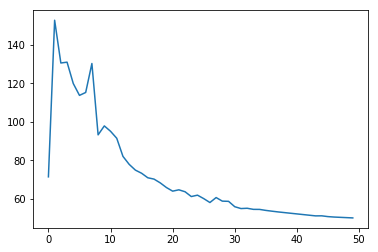

In [18]:
plt.plot(range(len(error_tab)), error_tab)

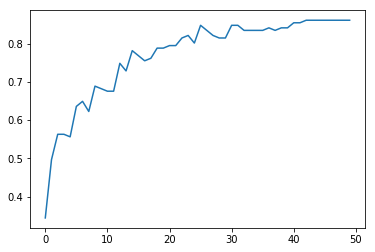

In [19]:
plt.plot(range(len(acc_tab)), acc_tab)

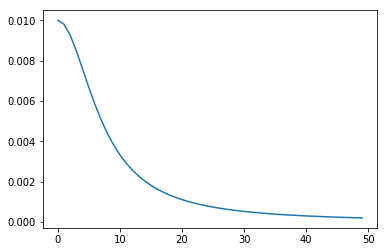

In [20]:
plt.plot(range(len(lr_tab)), lr_tab)